<a href="https://colab.research.google.com/github/JamesCFabrianes/Google-Collab-Python-/blob/main/B64_Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/bread_basket.csv")
df.head(7)

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend
5,3,Cookies,30-10-2016 10:07,morning,weekend
6,4,Muffin,30-10-2016 10:08,morning,weekend


In [ ]:
df["period_day"].value_counts()

afternoon    11569
morning       8404
evening        520
night           14
Name: period_day, dtype: int64

In [ ]:
df["period_day"].value_counts() / df.shape[0] * 100

afternoon    56.414883
morning      40.981128
evening       2.535720
night         0.068269
Name: period_day, dtype: float64

In [ ]:
df["weekday_weekend"].value_counts()

weekday    12807
weekend     7700
Name: weekday_weekend, dtype: int64

In [ ]:
df.groupby(["weekday_weekend", "period_day"])["Item"].count()

weekday_weekend  period_day
weekday          afternoon     7273
                 evening        356
                 morning       5174
                 night            4
weekend          afternoon     4296
                 evening        164
                 morning       3230
                 night           10
Name: Item, dtype: int64

In [ ]:
round(df.groupby(["weekday_weekend", "period_day"])["Item"].count() / df.shape[0] * 100, 2)

weekday_weekend  period_day
weekday          afternoon     35.47
                 evening        1.74
                 morning       25.23
                 night          0.02
weekend          afternoon     20.95
                 evening        0.80
                 morning       15.75
                 night          0.05
Name: Item, dtype: float64

In [ ]:
count_df = pd.DataFrame(df["Item"].value_counts()).reset_index()
count_df.columns = ["Items", "Counts"]
count_df["Percentage"] = round(count_df["Counts"] / df.shape[0] * 100, 2)
# count_df.sample(5)

In [ ]:
import plotly.express as px

fig = px.treemap(count_df,
                 path = [px.Constant("Transaction"), "Items"],
                 values = "Counts",
                 color = "Percentage",
                 color_continuous_scale="RdBu")

fig.show()

In [ ]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [ ]:
df["date_time"].dtypes # Format masih dalam Object atau String

dtype('O')

In [ ]:
# Ubah format string pada kolom date menjadi tipe datetime

df["date_time"] = pd.to_datetime(df["date_time"])
df["date_time"].dtypes

dtype('<M8[ns]')

In [ ]:
df["Month"] = df["date_time"].dt.month
df["date"] = df["date_time"].dt.date
df["time"] = df["date_time"].dt.time
df["year"] = df["date_time"].dt.year
df["hour"] = df["date_time"].dt.hour
df["minute"] = df["date_time"].dt.minute
df["second"] = df["date_time"].dt.second
df["day"] = df["date_time"].dt.day

In [ ]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,Month,date,time,year,hour,minute,second,day
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,2016-10-30,09:58:00,2016,9,58,0,30
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10:05:00,2016,10,5,0,30
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10:05:00,2016,10,5,0,30
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10:07:00,2016,10,7,0,30
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10:07:00,2016,10,7,0,30


In [ ]:
countByHour = df.groupby("hour")["Transaction"].count().reset_index()
countByHour.sort_values("hour", inplace=True)

<Axes: xlabel='hour', ylabel='Transaction'>

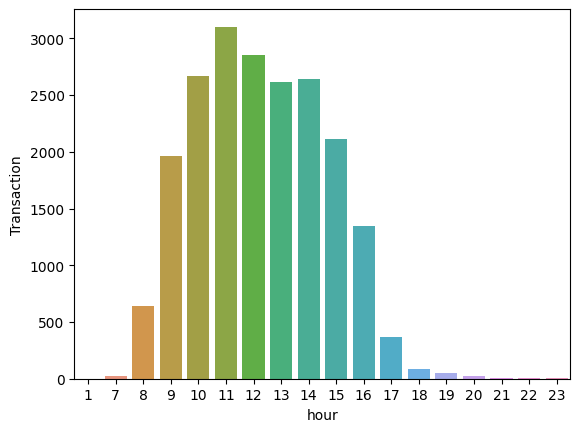

In [ ]:
import seaborn as sns
sns.barplot(x = countByHour["hour"],
            y = countByHour["Transaction"])

In [ ]:
# Preprocess data transaksi

transaction = df.groupby(["Transaction", "Item"])["Item"].count().reset_index(name = "Number of Items")
transaction.head()

,Transaction,Item,Number of Items
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1


In [ ]:
table = transaction.pivot_table(index="Transaction",
                                columns = "Item",
                                values = "Number of Items",
                                aggfunc = "sum").fillna(0)

table

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encoding(value):
    if value == 0:
        return False
    return True

final_table = table.applymap(encoding)
final_table

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9681,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9682,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
!pip3 install mlxtend

In [ ]:
import mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
freq = apriori(final_table, min_support = 0.00000015, use_colnames = True)

rules = association_rules(freq,
                          metric = "lift",
                          min_threshold = 3)

rules.sort_values("support", ascending=False, inplace=True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
226,(Coke),(Sandwich),0.019440,0.071844,0.005177,0.266304,3.706722,0.003780,1.265043,0.744697
227,(Sandwich),(Coke),0.071844,0.019440,0.005177,0.072059,3.706722,0.003780,1.056705,0.786742
5600,"(Juice, Coffee)",(Cookies),0.020602,0.054411,0.003698,0.179487,3.298730,0.002577,1.152437,0.711512
5602,(Juice),"(Cookies, Coffee)",0.038563,0.028209,0.003698,0.095890,3.399261,0.002610,1.074860,0.734129
5603,(Cookies),"(Juice, Coffee)",0.054411,0.020602,0.003698,0.067961,3.298730,0.002577,1.050812,0.736951
...,...,...,...,...,...,...,...,...,...,...
82769,"(Juice, Farm House, Medialuna)","(Brownie, Coffee)",0.000106,0.019651,0.000106,1.000000,50.887097,0.000104,inf,0.980452
82770,"(Juice, Brownie, Medialuna)","(Farm House, Coffee)",0.000211,0.006656,0.000106,0.500000,75.119048,0.000104,1.986688,0.986896
82771,"(Juice, Farm House, Brownie)","(Medialuna, Coffee)",0.000211,0.035182,0.000106,0.500000,14.211712,0.000098,1.929635,0.929832
82772,"(Farm House, Medialuna, Coffee)","(Juice, Brownie)",0.001268,0.002536,0.000106,0.083333,32.864583,0.000102,1.088143,0.970803
